In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import zipfile

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
with zipfile.ZipFile('/content/Twitter_Data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')
df = pd.read_csv('/mnt/data/Twitter_Data.csv')
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [31]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)
df['processed_text'] = df['clean_text'].apply(clean_text)

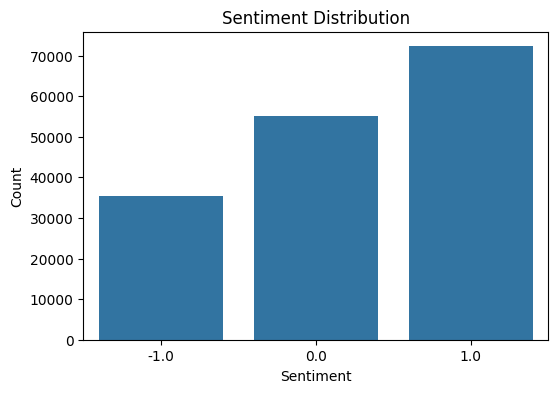

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [14]:
X = df['processed_text']
y = df['category']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes Results")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))


Naive Bayes Results
Accuracy: 0.6913330265378126
              precision    recall  f1-score   support

        -1.0       0.85      0.39      0.53      7230
         0.0       0.78      0.61      0.68     10961
         1.0       0.63      0.90      0.74     14404

    accuracy                           0.69     32595
   macro avg       0.75      0.63      0.65     32595
weighted avg       0.73      0.69      0.68     32595



In [17]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

print("\nSVM Results")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


SVM Results
Accuracy: 0.8519711612210462
              precision    recall  f1-score   support

        -1.0       0.83      0.75      0.79      7230
         0.0       0.83      0.91      0.87     10961
         1.0       0.89      0.86      0.87     14404

    accuracy                           0.85     32595
   macro avg       0.85      0.84      0.84     32595
weighted avg       0.85      0.85      0.85     32595



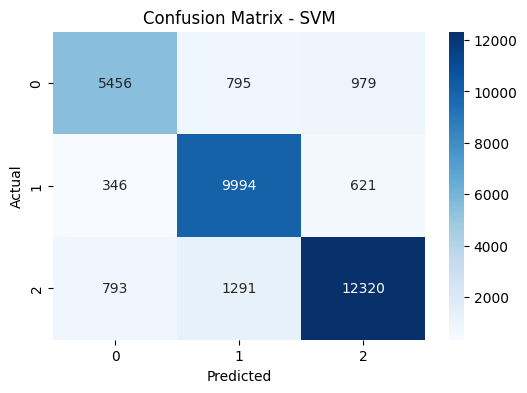

In [18]:
cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    prediction = svm_model.predict(vector)
    return prediction[0]

print("\nCustom Predictions:")
print("Text: I love this product ->", predict_sentiment("I love this product"))
print("Text: This is the worst experience ->", predict_sentiment("This is the worst experience"))


Custom Predictions:
Text: I love this product -> 1.0
Text: This is the worst experience -> -1.0
